# By 

# Member of DQLab
# **Sermon Paskah Zagoto**

### **Eksplorasi Data & Data Pre-processing**

**Eksplorasi** Data: Memahami Data dengan Statistik - Part

In [1]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print("Shape dataset : ", dataset.shape)
print('\nLima data teratas')
dataset.head()
print('\nInformasi dataset')
dataset.info()
print('Statistik deskriptif')
dataset.describe()

Shape dataset :  (12330, 18)

Lima data teratas

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Eksplorasi Data: Memahami Data dengan Statistik - Part 2**

In [3]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

**Eksplorasi Data: Memahami Data dengan Visual**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


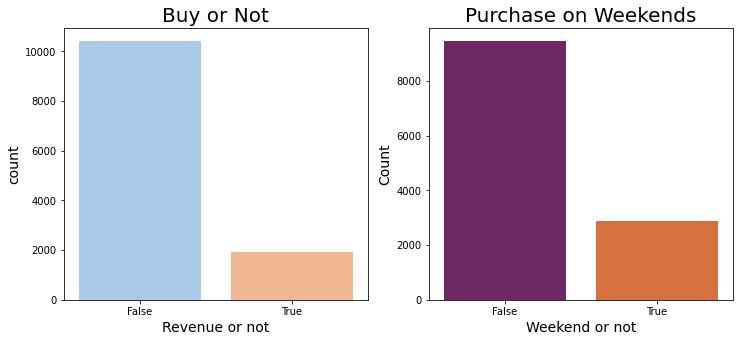

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

**Tugas Praktek**

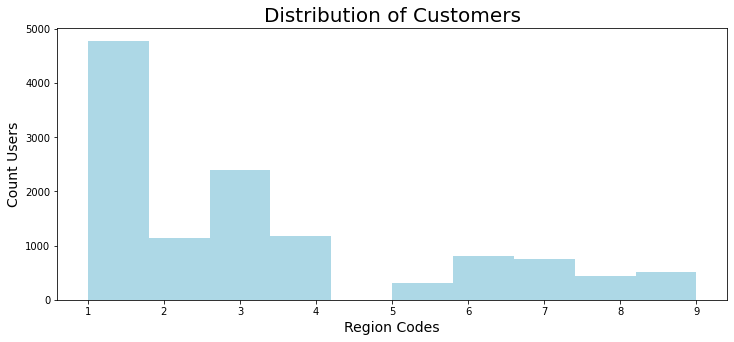

In [5]:
import matplotlib.pyplot as plt

# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers' , fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

**Data Pre-processing: Handling Missing Value - Part 1**

In [7]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())

#Counting total missing value
print('\nCounting total missing value:')
dataset.isnull().sum().sum()

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:


112

**Data Pre-processing: Handling Missing Value - Part 2**

In [8]:
#Drop rows with missing value
dataset_clean = dataset.dropna()
print('Ukuran dataset_clean:', dataset_clean.shape)

Ukuran dataset_clean: (12316, 18)


**Data Pre-processing: Handling Missing Value - Part 3**

In [9]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

**Tugas Praktek**

In [10]:
import pandas as pd
dataset1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

**Data Preprocessing: Scaling**

“Setelah berhasil menangani missing value, sekarang mari kita mempelajari tahapan preprocessing selanjutnya. Aksara, tolong tampilkan kembali 5 dataset teratas dan deskripsi statistik dari dataset. Coba perhatikan, rentang nilai dari setiap feature cukup bervariasi. Misalnya, ProductRelated_Duration vs BounceRates.  ProductRelated_Duration memiliki rentang nilai mulai dari 0 - 5000; sedangkan BounceRates rentang nilainya 0 - 1. Bisa kamu lihat?”

 

Aku mengangguk. Senja pun melanjutkan,

“Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.”

 

 “Kenapa ke range 0 - 1, tidak menggunakan range yang lain?” tanyaku penasaran.

“Karena rumus dari rescaling adalah

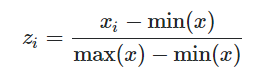

dengan rumus ini, nilai max data akan menjadi 1 dan nilai min menjadi 0; dan nilai lainnya berada di rentang keduanya. Rumus ini tidak memungkinkan adanya rentang nilai selain 0 – 1,” ujar Senja sembari menggambarkan rumusnya pada buku catatanku.

**Tugas Praktek**

In [11]:
from sklearn.preprocessing import MinMaxScaler

#Define MinMaxScaler as scaler
scaler = MinMaxScaler()

#list all the feature that need to be scaled
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

#Apply fit_transfrom to scale selected feature
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])

#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


**Data Pre-processing: Konversi string ke numerik**

Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris.

In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


### **Pemodelan Dengan Scikit-Learn**

**Features & Label**

In [14]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']

# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


**Training dan Test Dataset**

In [15]:
from sklearn.model_selection import train_test_split

# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


**Training Model: Fit**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Call the classifier
model = DecisionTreeClassifier()

# Fit the classifier to the training data
model = model.fit(X_train, y_train)

**Training Model: Predict**

In [17]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


**Evaluasi Model Performance - Part**

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8617193836171938

Confusion matrix:
[[1886  158]
 [ 183  239]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.57      0.58       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



### **Supervised Learning - Algorithm**

**Classification - Logistic Regression**

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).


Logistic Regression hanya dapat mengolah data dengan tipe numerik. Pada saat preparasi data, pastikan untuk mengecek tipe variabel yang ada dalam dataset dan pastikan semuanya adalah numerik, lakukan data transformasi jika diperlukan.

 

**Pemodelan Permasalahan Klasifikasi dengan Logistic Regression**

Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8617193836171938

Confusion matrix
[[2010   34]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Classification - Decision Tree**

Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut:

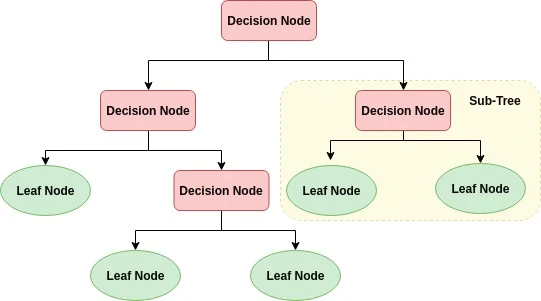

Decision tree terdiri dari :



1.   Decision Node yang merupakan feature/input variabel;
2.   Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
3. Leaf yang merupakan output/hasil.

Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

 
Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :

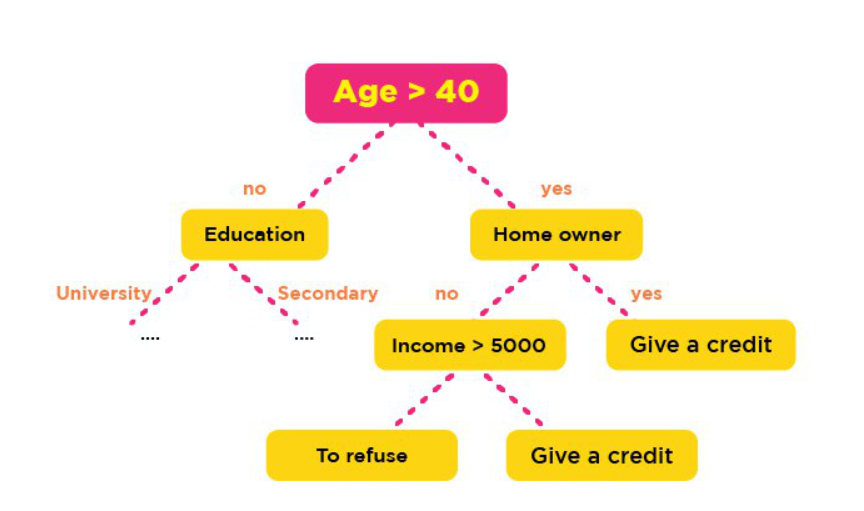

Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

Seperti yang sudah dilakukan dalam prosedur pemodelan machine learning, selanjutnya dapat dengan mudah melakukan pemodelan decision tree dengan menggunakan scikit-learn module, yaitu DecisionTreeClassifier.

**Tugas Praktek**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train,y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8634766153014328


**Regression: Linear Regression - Part 1**

Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

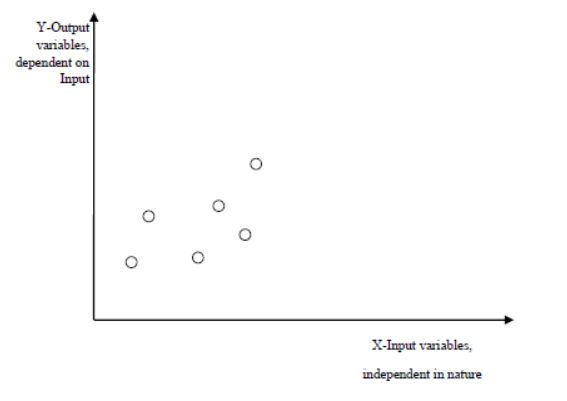

Model regresi terdiri atas 2 tipe yaitu :

1. Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
2. Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).

Adapun model regresi yang paling umum digunakan adalah Linear Regression.

**Regression: Linear Regression - Part 2**

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun). Rumus matematis dari Linear Regression adalah:

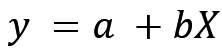

untuk simple linear regression, atau

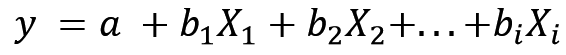

untuk multiple linear regression dengan, y adalah target/label, X adalah feature, dan a,b adalah model parameter (intercept dan slope).

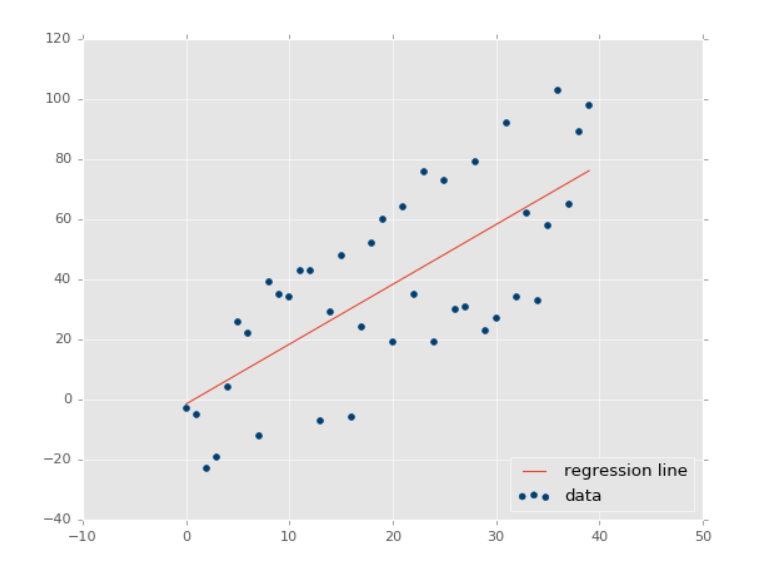


Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

1. Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
2. Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
3. Tidak ada autocorrelation dalam data, contohnya pada time-series data.
 
Pemodelan Linear regression menggunakan scikit-learn tidaklah sulit. Secara prosedur serupa dengan pemodelan logistic regression. Cukup memanggil LinearRegression dengan terlebih dahulu meng-import fungsi tersebut :

**from sklearn.linear_model import LinearRegression**

**Tugas Praktek**

In [21]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')

#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])

# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# checking the shapes
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train,y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


**Regression Performance Evaluation**

Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan.

Mean Squared Error (MSE) adalah rata-rata dari squared error:

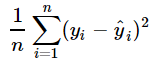

Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE:

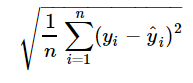

Mean Absolute Error (MAE) adalah rata-rata dari nilai absolut error:

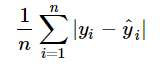

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.

**Tugas Praktek**

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


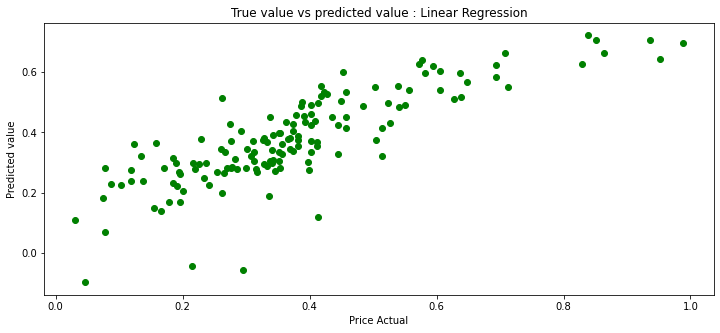

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

### **Unsupervised Learning - Algorithm**

Unsupervised Learning adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain. Contohnya pada gambar berikut:

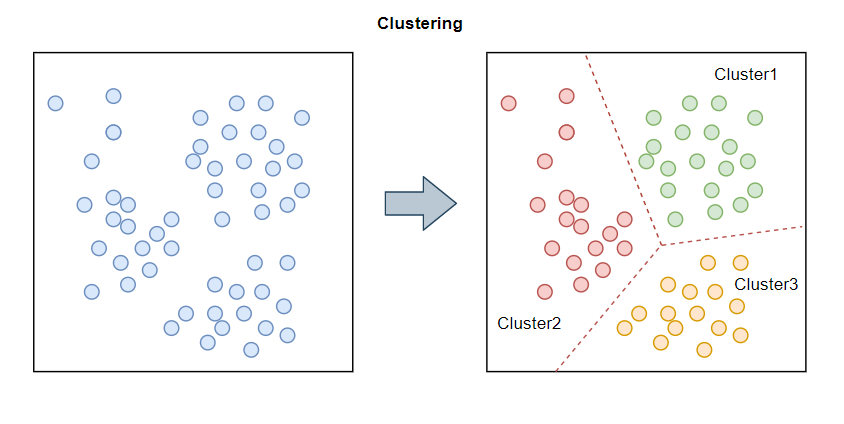

**K-Means Clustering**

"Jadi, Algorithm K-Means itu apa dan bagaimana cara kerjanya?” tanyaku antusias.

 “K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.”

Aku masih penasaran. “Jadi, bagaimana kita mengukur kedekatan objek dan centroid?”

 “Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski. Saya share yah rumusnya,” ujar Senja.

Aku menyimak isi rumus yang dibagikan Senja di slide presentasinya:

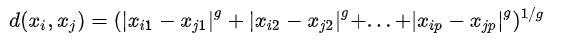

xi , xj adalah dua buah data yang akan dihitung jaraknya, dan p = dimensi/jumlah dari data

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu :

Jarak Manhattan di mana g = 1
Jarak Euclidean di mana g = 2
Jarak Chebychev di mana g = ∞
 “Nja, aku masih bingung, cara menentukan centroid bagaimana caranya?”

 “Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data. Sampai sini cukup dipahami?”

“Yup, boleh lanjut, Nja,” sahutku mempersilakan Senja kembali menjelaskan.

“Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah.”

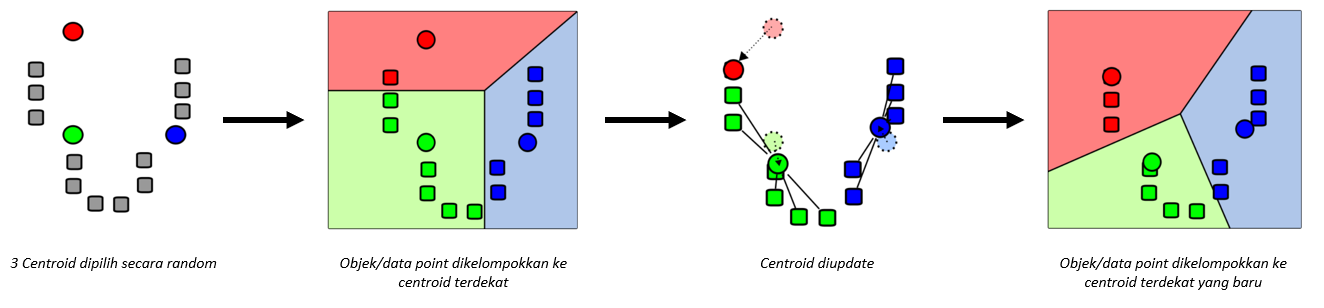

**Tugas Praktek**

In [23]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

**Tugas Praktek**

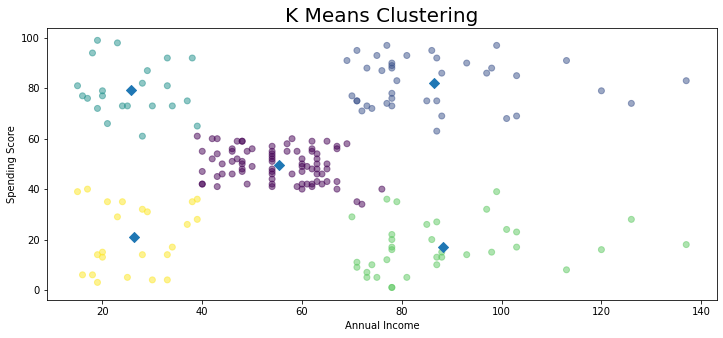

In [24]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values

#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Measuring Cluster Criteria**

“Segmentasinya udah jadi nih, Nja. Tapi, bagaimana kita tahu bahwa membagi segmentasi ke dalam 5 cluster adalah segmentasi yang paling optimal? Karena jika dilihat pada gambar beberapa data point masih cukup jauh jaraknya dengan centroidnya.”

 

 “Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia,” jawab Senja langsung.

Aku kembali bertanya karena rasanya masih ada yang janggal. “Memang apa fungsi inertia, Nja?”

“Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.”

“Kalau begitu,   bagaimana caranya mengetahui nilai K yang paling baik dengan inertia yang paling kecil? Apakah harus trial Error dengan mencoba berbagai jumlah cluster?”

“Benar, kita perlu mencoba beberapa nilai, dan memplot nilai inertia-nya. Semakin banyak cluster maka inertia semakin kecil. Sini deh, saya tunjukkan gambarnya.”

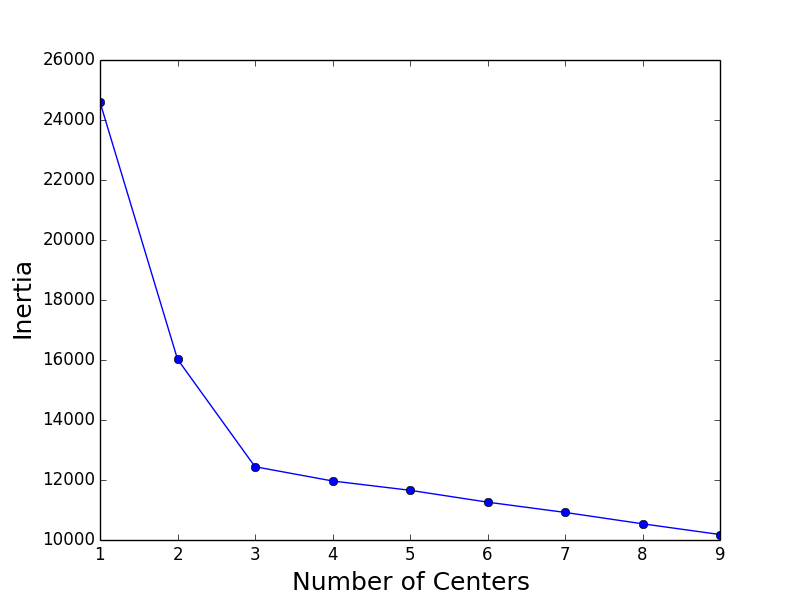

Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.

**Tugas Praktek**

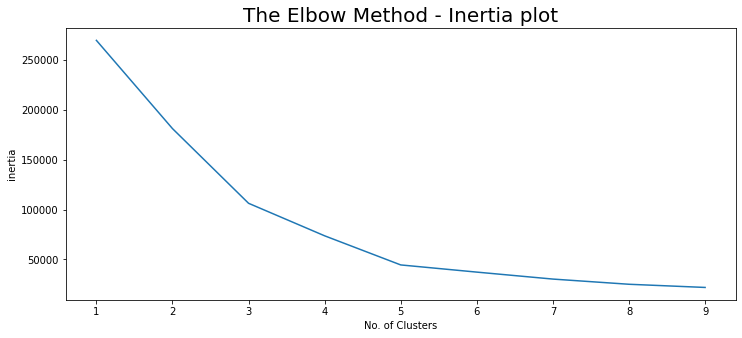

In [25]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []

#looping the inertia calculation for each k
for k in range(1, 10):
	#Assign KMeans as cluster_model
	cluster_model = KMeans(n_clusters = k, random_state = 24)
	#Fit cluster_model to X
	cluster_model.fit(X)
	#Get the inertia value
	inertia_value = cluster_model.inertia_
	#Append the inertia_value to inertia list
	inertia.append(inertia_value)

#Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

### **Mini Project**

**Pendahuluan**

“Praktikmu cukup memuaskan. Jadi saya sudah bisa melepasmu untuk mengerjakan proyek lagi ya,” pancing Senja.

“Proyek apa nih? tanyaku.

“Ini saya baru dapat kiriman data dari e-commerce kita. Divisi e-commerce kita ingin memprediksi apakah user- user yang sedang mengunjungi halaman website yang baru akan mengklik banner promo (ads) di halaman tersebut atau tidak berdasarkan feature yang ada. Tolong buatkan machine learning model untuk menyelesaikan permasalahan dari e-commerce kita ini ya.” 

"Coba cek email yang baru saja saya kirimkan, Aksara," kata Senja. 

"Ok!" aku pun segera membuka kotak masuk dari Senja.

**Case Study: Promos for our e-commerce - Part 1**

Aku akan membuat machine learning model untuk menyelesaikan permasalahan dari e-commerce divisi kantor.

Adapun feature - feature dalam dataset ini adalah :

1. 'Daily Time Spent on Site' : lama waktu user mengunjungi site (menit)
2. 'Age' : usia user (tahun)
3. 'Area Income' : rata - rata pendapatan di daerah sekitar user
4. 'Daily Internet Usage' : rata - rata waktu yang dihabiskan user di internet dalam sehari (menit)
5. 'Ad Topic Line' : topik/konten dari promo banner
6. 'City' : kota dimana user mengakses website
7. 'Male' : apakah user adalah Pria atau bukan
8. 'Country' : negara dimana user mengakses website
9. 'Timestamp' : waktu saat user mengklik promo banner atau keluar dari halaman website tanpa mengklik banner
10. 'Clicked on Ad' : mengindikasikan user mengklik promo banner atau tidak (0 = tidak; 1 = klik).
 

Di proyek ini, aku diharapkan untuk membuat machine learning model sesuai dengan prosedur machine learning yang sudah disharing sebelumnya. Jadi, tahap - tahap yang perlu dilakukan adalah (langkah ke-1) terlebih dahulu

1. Data eksplorasi dengan head(), info(), describe(), shape

In [28]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  ...        Timestamp  Clicked on Ad
0                     68.95   35  ...   3/27/2016 0:53              0
1                     80.23   31  ...    4/4/2016 1:39              0
2                     69.47   26  ...  3/13/2016 20:35              0
3                     74.15   29  ...   1/10/2016 2:31              0
4                     68.37   35  ...    6/3/2016 3:36              0

[5 rows x 10 columns]
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line   

**Case Study: Promos for our e-commerce - Part 2**

Sekarang mari melanjutkan dengan ekplorasi data untuk langkah ke-2 dan ke-3:

2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
 

In [29]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site  ...  Clicked on Ad
Daily Time Spent on Site                  1.000000  ...      -0.748117
Age                                      -0.331513  ...       0.492531
Area Income                               0.310954  ...      -0.476255
Daily Internet Usage                      0.518658  ...      -0.786539
Male                                     -0.018951  ...      -0.038027
Clicked on Ad                            -0.748117  ...       1.000000

[6 rows x 6 columns]

[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
Clicked on Ad
0    500
1    500
dtype: int64


**Case Study: Promos for our e-commerce - Part 3**

Di proyek ini, aku akan melanjutkan mengeksplorasi data dengan visualisasi dengan tahap - tahap yang perlu dilakukan adalah (langkah ke-4):

4. Data eksplorasi dengan visualisasi:
- Jumlah user dibagi ke dalam rentang usia menggunakan histogram (hist()), gunakan bins = data.Age.nunique() sebagai argumen. nunique() adalah fungsi untuk menghitung jumlah data untuk setiap usia (Age).
- Gunakan pairplot() dari seaborn modul untuk menggambarkan hubungan setiap feature. 

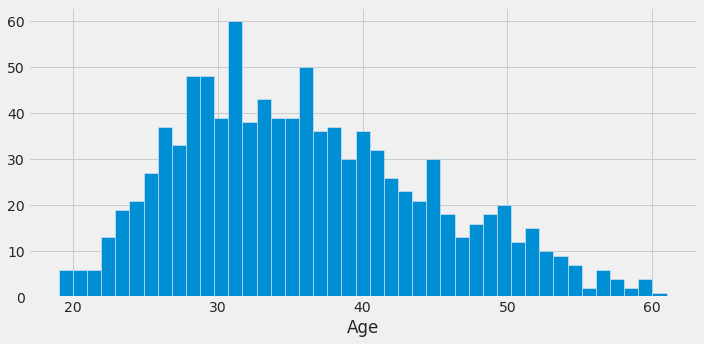

<Figure size 864x360 with 0 Axes>

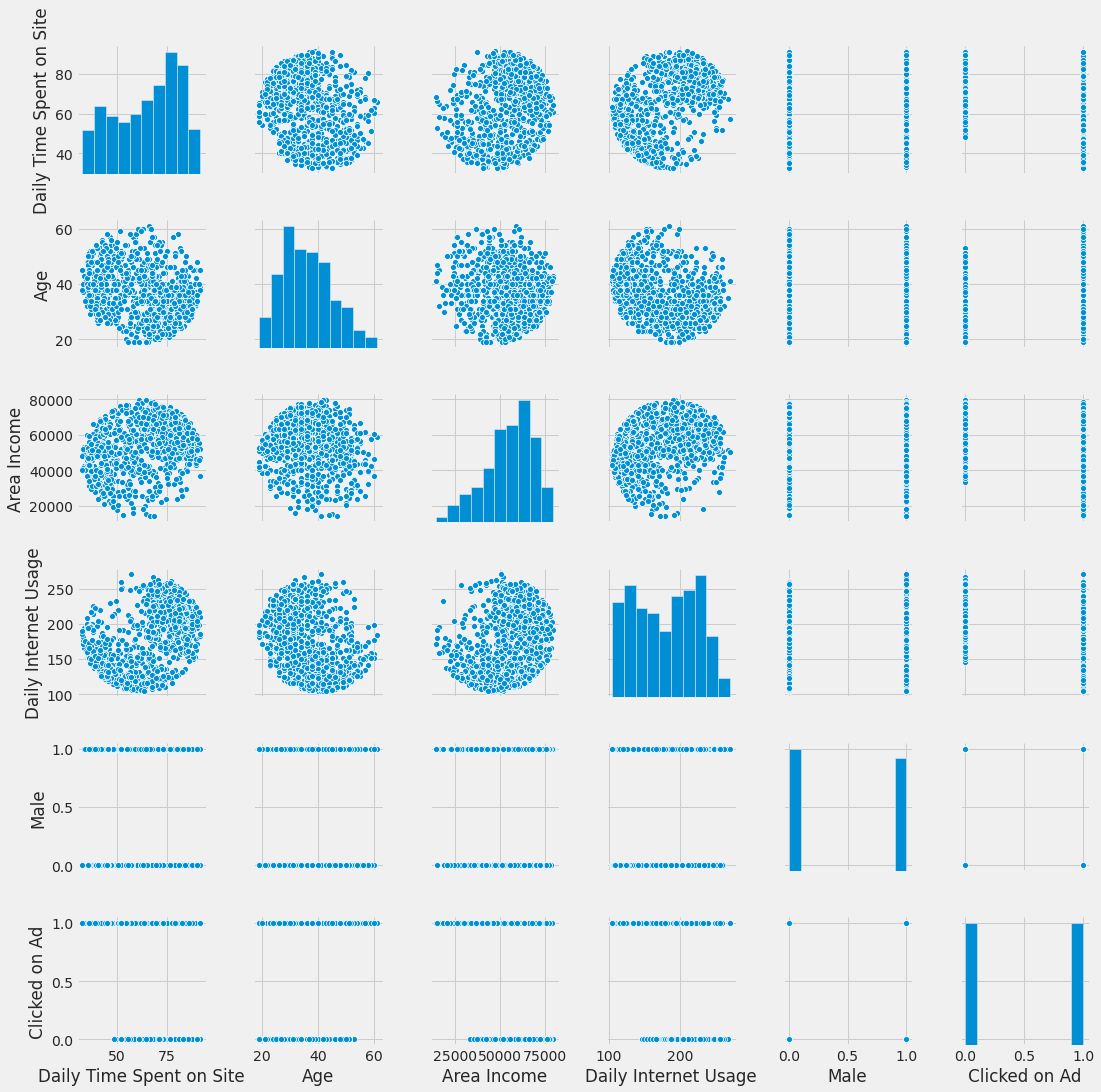

In [30]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

**Case Study: Promos for our e-commerce - Part 4**

Di bagian proyek (langkah ke-5) ini aku akan mengecek apakah terdapat missing value dari data, jika terdapat missing value dapat dilakukan treatment seperti didrop atau diimputasi dan jika tidak maka dapat melanjutkan ke langkah berikutnya.

5. Cek missing value

In [31]:
#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum().sum())


[5] Cek missing value
0


**Case Study: Promos for our e-commerce - Part 5**

Pada langkah ke-6 ini aku akan melakukan pemodelan dengan Logistic Regression dengan cara seperti berikut:

6. Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing :
- Deklarasikan data ke dalam X dengan mendrop feature/variabel yang bukan numerik, (type = object) dari data (Logistic Regression hanya dapat memproses numerik variabel). Assign Target/Label feature dan assign sebagai y
- Split X dan y ke dalam training dan testing dataset, gunakan perbandingan 80:20 dan random_state = 42
- Assign classifier sebagai logreg, kemudian fit classifier ke X_train dan predict dengan X_test. Print evaluation score.

In [32]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


**Case Study: Promos for our e-commerce - Part 6**

Di langkah terakhir ini atau langkah ke-7 aku akan melihat performansi model dengan menggunakan confusion matrix dan classification report.

7. Print Confusion matrix dan classification report

In [33]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



**Penutup/Kesimpulan**

Congratulations! Akhirnya selesai satu lagi modul Machine Learning With Python for Beginner. Berdasarkan materi-materi yang telah kupelajari dan praktekkan dalam modul ini, aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya

- Memahami apa itu machine learning dengan jenisnya untuk pemodelan
- Memahami dan mampu melakukan Eksplorasi Data & Data Pre-processing
- Memahami dan mampu melakukan proses-proses Pemodelan dengan Scikit-Learn
- Memahami dan mampu melakukan proses-proses pemodelan dengan menggunakan algoritma pada Supervised Learning
- Memahami dan mampu melakukan proses-proses pemodelan dengan menggunakan algoritma pada Unsupervised Learning
- Mengerjakan mini project yang merupakan integrasi keseluruhan materi dan tentunya materi-materi pada modul-modul sebelumnya untuk menyelesaikan persolan bisnis.
 

Keep fighting!